# Exercise Session 5 -  Support Vector Machine (SVM)

Welcome to the 5th exercise session of CS233 - Introduction to Machine Learning.  

We will use Scikit-learn, a Python package of machine learning methods, in this exercise. We are using a toy binary classification example to understand Linear SVM.


In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 1 Support Vector Machine (SVM)
SVM tries to solve a linear classification problem of the **primal form**:  
    \begin{align}
        \underset{\tilde{\mathbf{w}},w_0,{\{\zeta_i\}}}{\operatorname{min}}  \ \ & \frac{1}{2}\|\tilde{\mathbf{w}}\|^2 + C \sum^N_{i=1}\xi_i \\
        \operatorname{subject \  to} \ \ &  y_i(\tilde{\mathbf{w}}^T\mathbf{x_i}+w_0) \geq 1-\xi_i , \forall \  i \\
                          &  \xi_i \geq 0 , \forall \  i
    \end{align}
where $\tilde{\mathbf{w}}$,$w_0$ are the weights and the bias, C weighs the penalty term, $\xi_n$ is a slack variable encoding how far a data point is beyond the correct margin and $y_i \in\{-1,1\}$ for binary classification. $\|\tilde{\mathbf{w}}\|$ is inversely related to the margin width, so minimizing it means maximizing the margin, and hence we minimize $\|\tilde{\mathbf{w}}\|$. As our data may not be linearly separable, maximizing the margin will lead to some misclassifications. $\xi_i$ is greater than zero when a data point is beyond the margin, and how many such data points are allowed is controlled by $C$. Hence with this objective function we get a maximum margin with a certain amount of misclassification.

The corresponding **dual problem** is given by:
\begin{align}
    \underset{\{\alpha_i\}}{\operatorname{max}} \ \ 
    & \sum_{i=1}^N \alpha_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \alpha_i\alpha_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \alpha_iy_i = 0 \\
                 & \ \ 0 \leq \alpha_i \leq C, \forall i \ \ 
\end{align}
**Question**
   * How can you write $\tilde{\mathbf{w}}$ using $\alpha_i$s? This relates the primal and dual coefficents.
   * How is $y(\mathbf{x})$ represented using $\alpha_i$s?
 
**Answer**
   * $\tilde{\mathbf{w}} = \sum_{i=1}^N \alpha_iy_i\mathbf{x_i} $
   * Plugging $\tilde{\mathbf{w}}$ gives: 
     \begin{align}
       \hat{y}(\mathbf{x}) &= \tilde{\mathbf{w}}^T\mathbf{x} + w_0 \\
                           &= \sum_{i=1}^N \alpha_iy_i\mathbf{x}_i^T\mathbf{x} + w_0
     \end{align}
   * The sum can be computed on the support vectors ($\cal{S}$) only, 
       \begin{align}
       \hat{y}(\mathbf{x}) & = \sum_{i \in \cal{S}} \alpha_iy_i\mathbf{x}_i^T\mathbf{x} + w_0
     \end{align}


# 2 Scikit-Learn

Training an SVM classifer is not an easy task. Therefore, in this session, we are going to use Scikit-Learn, which is a machine learning library written in python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize an SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

Please install scikit-learn in your conda environment by following the instructions at this link:https://scikit-learn.org/stable/install.html if you don't have it.

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with training data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for a simple example.

We will explore linear SVM in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with a linear kernel (`kernel = 'linear'`). Note that the notion of kernel will be discussed in a future lecture. In essence, SVC with a linear kernel is equivalent to the Support Vector Machine formulation seen in class.

# 3 Binary Classification

Let's begin with a simple **binary** classification task using Linear SVM.
The data is simply **linearly** separable.

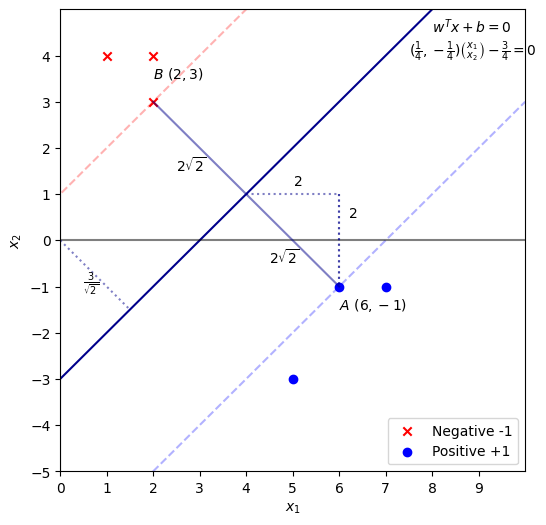

In [4]:
# Simple data
from plots import plot_simple_data
x = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])
plot_simple_data()

### 3.1 Linear SVM
In this part, you are asked to build an SVM classifier using SVC and to understand the outputs from the fitted model.

/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 5 - Support Vector Machine/plots.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class1 = plt.scatter(X1[:, 0], X1[:, 1], zorder=10, cmap=plt.cm.Paired,
/mnt/d/Study Materials/EPFL Exchange Courses/CS-233 Introduction to Machine Learning/Exercises ML/Exercise 5 - Support Vector Machine/plots.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  class2 = plt.scatter(X2[:, 0], X2[:, 1], zorder=10, cmap=plt.cm.Paired,


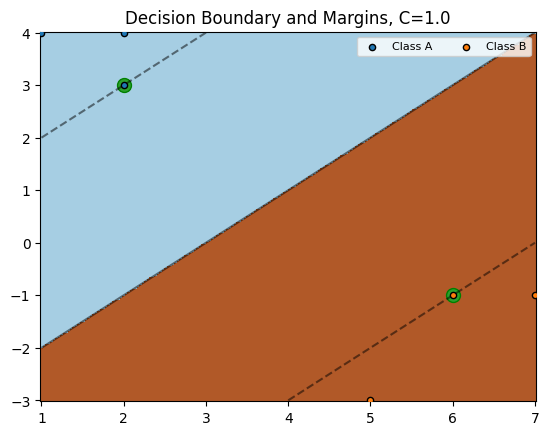

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]
a (Coefficients of the support vector in the decision function) =  [[-0.0625  0.0625]]


In [5]:
# Let use SVC with a linear kernel
from sklearn.svm import SVC
from plots import plot

## CODE HERE
# 1. Declare an SVC with C=1.0 and kernel='linear'
clf = SVC(C = 1.0, kernel = 'linear')

# 2. use x and y to fit the model
clf.fit(x, y) 

# 3. show the fitted model
plot(x, y, clf)

print('w = ',clf.coef_)
print('w0 = ',clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)
print('a (Coefficients of the support vector in the decision function) = ', clf.dual_coef_)

In [6]:
# Use the weights (w) from the fitted model to predict the labels of input data points

def raw_predict(x, w, w0):
    '''
    given input data, w and w0, output the prediction result
    
    input:
    x: data, np.array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
    w: weights, np.array of shape (D,)
    w0: bias, np.array of shape (1,)
    
    output:
    out: predictions, np.array of shape (N, ). tip: .astype(int) 
    '''
    ## CODE HERE
    out = np.sign(np.dot(x, w) + w0).astype(int)
    return out

x_test = np.array([
    [4, 2],
    [ 6, -3]])

raw_pred = raw_predict(x_test, clf.coef_[0], clf.intercept_)
print("Prediction from the model: ", clf.predict(x_test))
print("Prediction from your implementation: ", raw_pred)
assert((raw_pred == clf.predict(x_test)).all())


Prediction from the model:  [-1  1]
Prediction from your implementation:  [-1  1]


In [10]:
# Find out the indices of the support vectors by using w and w0

decision_function_from_model = clf.decision_function(x) # this function outputs the results of wx+w0

## we can also calculate the decision function manually
## CODE HERE
decision_function = np.dot(x, clf.coef_[0]) + clf.intercept_

assert((decision_function_from_model == decision_function).all())

## according to the condition that support vectors should satisfy
## CODE HERE tips: use np.where to put the condition in.
support_vector_indices = np.where(y * decision_function <= 1.)[0]
print('I find the indices of support vectors = ', support_vector_indices)
assert((support_vector_indices == clf.support_).all())


I find the indices of support vectors =  [2 3]


### 3.2 Dual Coefficients VS Primal Coefficients

By using the `dual_coef_` attribute of the model, we can get the dual coefficients $\alpha_i$ of the support vectors.  
**Question** Scikit returns dual coefficients in a slightly different form, can you identify the difference?

**Answer** Scikit returns the coefficients together with the label of the class {-1,1}, i.e., it returns $\alpha_iy_i$, where $y_i \in \{1,-1\}$. Additionally, the coefficients returned by scikit are only the ones of the support vectors.

Given the support vectors ($\cal{S}$) and their dual_coefficients, the weights can be computed by:
\begin{align}
\tilde{\mathbf{w}} & = \sum_{i \in \cal{S}}^N \alpha_iy_i\mathbf{x_i} 
\end{align}


In [6]:
# Compute the primal coefficients given the dual coefficients and support vectors

def compute_w(dual_coef, support_vectors):
    '''
    given the dual coefficients and support_vectors, compute the primal coefficients
    
    input:
    dual_coef: dual coefficients, np.array of shape (1, n) where n is the number of support vectors.
    support_vectors: np.array of shape (n, D) where n is the number of support vectors and D is the dimension of the features.
    
    output:
    w: primal coefficients, np.array of shape (D, )
    '''
    ## CODE HERE
    w = np.sum((dual_coef).T * support_vectors, axis=0)
    
    return w


w = compute_w(clf.dual_coef_, clf.support_vectors_)

print("Primal coefficients from the model: ", clf.coef_[0])
print("Primal coefficients from your implementation: ", w)

assert((w == clf.coef_[0]).all())



Primal coefficients from the model:  [ 0.25 -0.25]
Primal coefficients from your implementation:  [ 0.25 -0.25]


### 3.3 Different C values
Let's try different values of C. In the code, vary the C value from 0.001 to 100 and notice the changes on a bigger dataset.  
**Question**: How does the margin vary with C? **Hint**: have a look at the optimization formulation above.

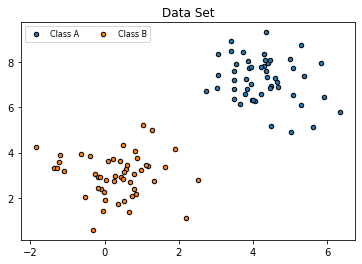

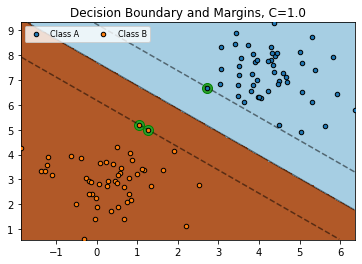

In [7]:
from sklearn.svm import SVC
from helpers import get_simple_dataset
from plots import plot

# Get the simple dataset
X, Y = get_simple_dataset()
plot(X,Y,None,dataOnly=True)

#Declare an SVM model with a linear kernel and C=1.0
clf = SVC(kernel='linear', C=1.0)

#call the fit method
clf.fit(X, Y)

#plot the decision boundary
plot(X, Y, clf)


The above plot shows the decision boundary and the margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyond the limits of an axis, they are not shown or shown close to the decision plane. 

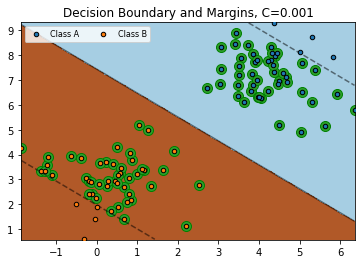

[[-0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001
  -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001
  -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001
  -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001
  -0.001 -0.001 -0.001 -0.001 -0.001 -0.001  0.001  0.001  0.001  0.001
   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
   0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
   0.001  0.001]]


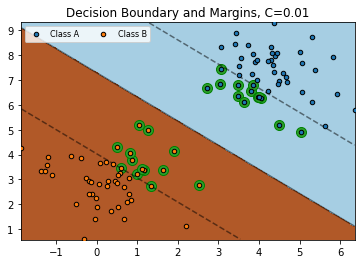

[[-0.01       -0.01       -0.01       -0.01       -0.01       -0.01
  -0.00062303 -0.01       -0.01       -0.01       -0.01       -0.01
  -0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.00062303  0.01        0.01        0.01        0.01
   0.01        0.01      ]]


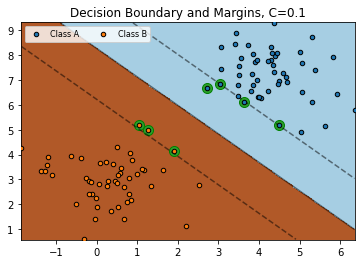

[[-0.1        -0.07157226 -0.02842774 -0.1         0.1         0.1
   0.1       ]]


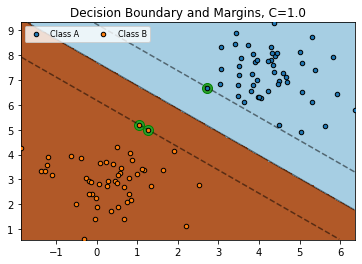

[[-0.39898096  0.26570602  0.13327494]]


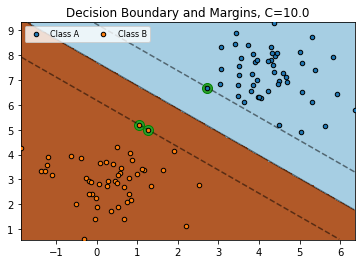

[[-0.39898096  0.26570602  0.13327494]]


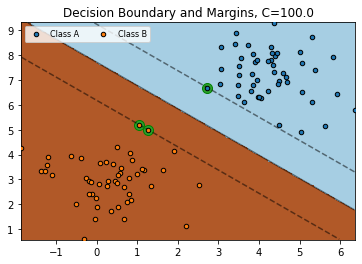

[[-0.39898096  0.26570602  0.13327494]]


In [8]:
# CODE HERE #
# Vary C and plot the boundaries
# Use np.logspace to generate 6 C values in the range (10e-3, 10e2) 

C = np.logspace(-3,2,6)
for c in C:
    #Declare an SVM model with a linear kernel and one C value 
    clf = SVC(kernel='linear', C=c)

    #call the fit method
    clf.fit(X, Y)

    #plot the decision boundary
    plot(X, Y, clf)
    print(clf.dual_coef_)


**Answer**: A lower C value allows for more misclassifications and hence yields a larger margin, while a bigger C value reduces the number of misclassfications and hence yields a smaller margin.

### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have a probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)